In [1]:
import math
import matplotlib.pyplot as plt

In [14]:
# From https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_online_algorithm

# For a new value newValue, compute the new count, new mean, the new M2.
# mean accumulates the mean of the entire dataset
# M2 aggregates the squared distance from the mean
# count aggregates the number of samples seen so far
def update(existingAggregate, newDelta, weight=1):
    (count, weightSum, weight2Sum, M2) = existingAggregate
    count += 1
    M2 += weight * newDelta * newDelta
    weightSum += weight
    weight2Sum += weight*weight
    return (count, weightSum, weight2Sum, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, weightSum, weight2Sum, M2) = existingAggregate
    mean = 0
    if count < 2:
        return float("nan")
    else:
        (mean, variance, sampleVariance) = (mean, M2 / weightSum, M2 / (weightSum - weight2Sum / weightSum))
        return (mean, variance, sampleVariance)

Initial standard deviation: 29.0
Final standard deviation: 0.4585302320805983


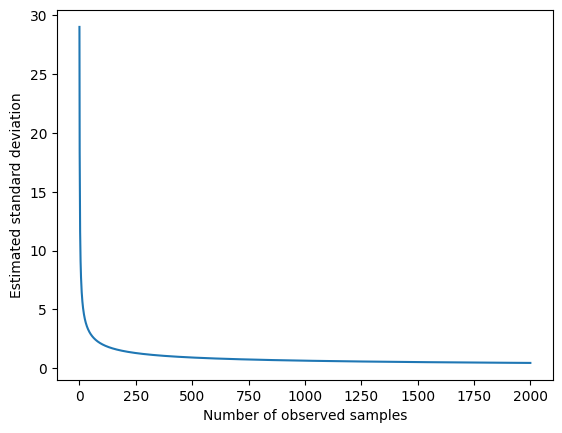

In [21]:
aggregate = (0, 0, 0, 0)
aggregate = update(aggregate, 0, 0.5)
aggregate = update(aggregate, -29, 0.5)
_, _, sampleVariance = finalize(aggregate)

standardDeviations = [math.sqrt(sampleVariance)]
observedSamples = [0]
for i in range(2000):
    aggregate = update(aggregate, 0)
    _, _, sampleVariance = finalize(aggregate)
    standardDeviations.append(math.sqrt(sampleVariance))
    observedSamples.append(i+1)

print("Initial standard deviation:", standardDeviations[0])
print("Final standard deviation:", standardDeviations[-1])

plt.plot(observedSamples, standardDeviations)
plt.xlabel("Number of observed samples")
plt.ylabel("Estimated standard deviation")
plt.show()